<a href="https://colab.research.google.com/github/ojw92/NLP-for-Text-Classification/blob/main/BERT_VOC_loc_met.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BERT Practice
#### v. 20230828

In [1]:
# 20230825 Pick up from here later :

# ROC curve for BERT : https://towardsdatascience.com/practical-introduction-to-transformer-models-bert-4715ed0deede
# Interesting read on BERT semantic similarity : https://christianbernecker.medium.com/nlp-similarity-use-pretrained-word-embeddings-for-semantic-similarity-search-with-bert-4beaf7b6a148
# Cool T-SNE graphs : https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d


# https://www.run.ai/guides/machine-learning-operations
# https://www.run.ai/guides/machine-learning-engineering/machine-learning-workflow
# https://www.run.ai/guides/machine-learning-engineering/machine-learning-automation

# https://research.google.com/colaboratory/local-runtimes.html
# https://stackoverflow.com/questions/60235353/docker-is-not-running-on-colab

"""
https://www.youtube.com/watch?v=0S81koZpwPA
install CUDA Toolkit, install WSL2, check for cuda availability!!
https://discuss.tensorflow.org/t/fail-to-use-4070ti/17447
Ubuntu vs WSL2 for Tensorflow??
"""


'\nhttps://www.youtube.com/watch?v=0S81koZpwPA\ninstall CUDA Toolkit, install WSL2, check for cuda availability!!\nhttps://discuss.tensorflow.org/t/fail-to-use-4070ti/17447\nUbuntu vs WSL2 for Tensorflow??\n'

In [2]:
# pip3 install torch torchvision torchaudio     # for PyTorch without GPU, just CPU


In [3]:
# Using the `Trainer` with `PyTorch` requires `accelerate>=0.20.1`: Please run `pip install transformers[torch]` or `pip install accelerate -U`
# https://stackoverflow.com/questions/76448287/how-can-i-solve-importerror-using-the-trainer-with-pytorch-requires-accele
# Most probably you might have an ImportError at the first line if accelerate is not already installed when you installed transformers.

!pip install -U accelerate
!pip install transformers -U
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117    # install PyTorch

import accelerate
import transformers

transformers.__version__, accelerate.__version__

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 251.2/251.2 kB 6.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.5/7.5 MB 40.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 268.8/268.8 kB 32.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 121.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 85.3 MB/s eta 0:00:00
Looking in indexes: https://download.pytorch.org/whl/cu117


('4.32.1', '0.22.0')

In [4]:
# Check if the GPU can be detected
# tensorflow-gpu has been removed. tensorflow package supports GPU accelerated operations via Nvidia CUDA.
import tensorflow as tf

device_name = tf.test.gpu_device_name()              # '/device:GPU:0' means GPU is enabled
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [5]:
import torch
# torch.cuda.is_available = lambda : False
""" # old way
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)
"""
# use my own GPU to train; move tensor to my GPU; https://www.run.ai/guides/gpu-deep-learning/pytorch-gpu
if torch.cuda.is_available():
   dev = "cuda:0"
else:
    dev = "cpu"
device = torch.device(dev)
print(device)
t1 = torch.zeros(4,3)
print(t1)
t1 = t1.to(device)
print(t1)

cuda:0
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [6]:
print(tf.config.list_physical_devices('GPU'))

# device_lib.list_local_devices()

torch.cuda.is_available()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


True

In [7]:
# https://medium.com/ai%C2%B3-theory-practice-business/use-gpu-in-your-pytorch-code-676a67faed09

# Make sure the same device is used for tensor allocation during all operations

a = t1.get_device()                    # returns the index of the GPU on which the tensor resides
b = torch.tensor(t1.shape).to(dev)     # use this index to direct placement for new tensors

# torch.cuda.set_device(  {GPU ID}  )     # alternative method to tensor placement

print(a)
print(b)

0
tensor([4, 3], device='cuda:0')


In [8]:
# https://medium.com/ai%C2%B3-theory-practice-business/use-gpu-in-your-pytorch-code-676a67faed09

# Check running environment info regarding Cuda and devices

import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION', )

from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')

# call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())
print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())


__Python VERSION: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
__pyTorch VERSION: 2.0.1+cu118
__CUDA VERSION
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
__CUDNN VERSION: 8700
__Number CUDA Devices: 1
__Devices
Active CUDA Device: GPU 0
Available devices  1
Current cuda device  0


In [9]:

# And check device information of my graphics driver

!pip install pycuda
import pycuda.driver as cuda
cuda.init()
## Get Id of default device
torch.cuda.current_device()
# 0
cuda.Device(0).name()   # '0' is the id of my GPU

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.7/1.7 MB 13.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 70.6/70.6 kB 8.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 78.7/78.7 kB 7.6 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2022.2.2-cp310-cp310-linux_x86_64.whl size=661265 sha256=fe9b582aa39ef8d7e4f673ab628fe4c0ad1c138581c63ff4d2ad3946a44b3248
  Stored in directory: /root/.cache/pip/wheels/1d/7b/06/82a395a243fce00035dea9914d92bbef0013401497d849f8bc
Successfully built pycuda


'Tesla T4'

In [10]:
!cat /proc/meminfo            # check memory resources available

MemTotal:       13294252 kB
MemFree:         4856204 kB
MemAvailable:    9351836 kB
Buffers:           83500 kB
Cached:          4612784 kB
SwapCached:            0 kB
Active:           829784 kB
Inactive:        7135912 kB
Active(anon):       6136 kB
Inactive(anon):  3282196 kB
Active(file):     823648 kB
Inactive(file):  3853716 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              5984 kB
Writeback:             0 kB
AnonPages:       3266380 kB
Mapped:          1114012 kB
Shmem:             18920 kB
KReclaimable:     118444 kB
Slab:             170136 kB
SReclaimable:     118444 kB
SUnreclaim:        51692 kB
KernelStack:        4928 kB
PageTables:        35624 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6647124 kB
Committed_AS:    4994288 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       77728 kB
VmallocChunk:          0 kB
Percpu:          

In [11]:
# install wandb for tracking data on dashboard
!pip install datasets wandb evaluate -qU
!wget https://raw.githubusercontent.com/huggingface/transformers/master/examples/pytorch/text-classification/run_glue.py

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 519.3/519.3 kB 4.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.1/2.1 MB 19.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81.4/81.4 kB 6.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 115.3/115.3 kB 7.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 14.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 10.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [12]:
















# the run_glue.py script requires transformers dev
#!pip install -q git+https://github.com/huggingface/transformers

In [13]:
import wandb

# log in to have data synced to account
wandb.login()                         # uncomment to enter API key when this line runs

# log every trained model
%env WANDB_LOG_MODEL=true

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


env: WANDB_LOG_MODEL=true


In [14]:

# https://github.com/PradipNichite/Youtube-Tutorials/blob/main/FineTune_BERT_Model_Youtube.ipynb

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# filter training data to desired dates (after 2022.2.22)
df = pd.read_csv('test.csv', index_col=0).drop_duplicates()
#df = df[df.columns[0:5]]

# filter training data to desired dates
from datetime import datetime, timedelta

df = df[df.Date.apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date() > datetime(2022,2,21).date())]

# For class imbalance, use roughly same ratio of R & N
# BERT doesn't need class imbalance addressed
# df = pd.concat([df[df.Class=='R'], df[df.Class=='N'].iloc[::3, :]])

# Reduce data to reduce training time to test features
# df22 = df22.sample(frac=0.01, random_state=5)




In [88]:
# Define Title + Content concatenator
from timeit import default_timer as timer
import re

def data_concat(df22, R_known=True):

    # Split the input dataframe into Text (Title + Contents) and Classes dataframes
    # input must have 3 columns of string entries (Title, Contents, and Classes)

    # check if every row entry of each column is string type (some are NaN, so no)
    # print(df22.applymap(lambda x : type(x).__name__).eq({'Title': 'str', 'Content': 'str', 'Class':'str'}))

    # convert NaN to empty strings (NaN -> str)
        # df22.apply(str) converts all columns to str, as well
    df22 = df22.replace(float('nan'), '', regex=True)

    # concatenate strings of title & content with a " " in between (1 body of text)
    df22['Text'] = df22['Title'] + " " + df22['Content']      # slicing DataFrame via .iloc[:,0] makes it a Series
    df22 = df22.loc[: , ['Text', 'Class']]    # so initialize it as a DataFrame. pd.DataFrame(some_Series) works

    if R_known == True:
    # R, r, YR = 1;     N, n, YN = 0
        R_cases = re.compile('R|YR|yy', re.IGNORECASE)
        N_cases = re.compile('N|YN', re.IGNORECASE)
        df22['Class'] = df22['Class'].replace(to_replace=R_cases, value=1)
        df22['Class'] = df22['Class'].replace(to_replace=N_cases, value=0)
    else:
        # R_known == False; prepping not yet classified data
        Y_N_cases = re.compile('Y|N', re.IGNORECASE)
        df22['Class'] = df22['Class'].replace(to_replace=Y_N_cases, value=0)     # all N's for simplicity

    df22['Class'] = df22['Class'].astype('int32')


    return df22


In [16]:
# combine title & content as text22, clean the text, then combine it with labels to a single df
df = data_concat(df)
df.head()

Text  Class
452  Zfold 3 or S22 ultra Trying to decide between ...      0
453  S22 video cam Anyone tried out the video camer...      0
454  Thinking about trading my S21Ultra for S22+ Ev...      0
455  S21 Ultra vs S22+ Both phones are currently at...      0
456  S21 or S22 Base/Standard Model Hey All,\n\nLoo...      0

In [17]:
df['Class'].value_counts()

0    21624
1     7297
Name: Class, dtype: int64

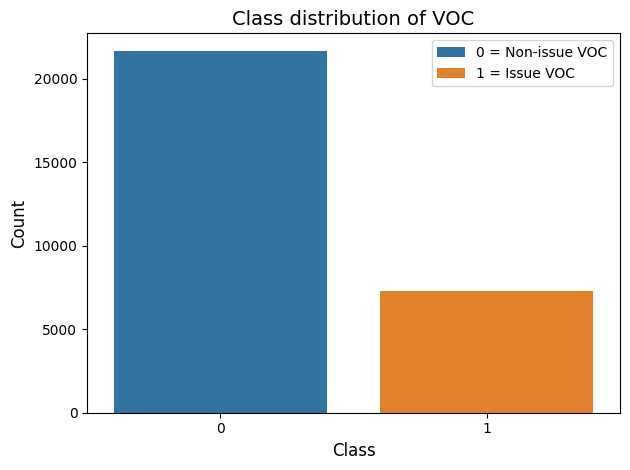

In [18]:
# Data Exploration - Histogram of Classes
sns.countplot(x=df['Class'], hue=df['Class'], dodge=False, data=df['Text'])
plt.title('Class distribution of VOC', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
"""
from matplotlib.patches import Rectangle
cmap = plt.get_cmap('jet')
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [cmap(0.27), cmap(0.75)]]
plt.legend(handles, ['0 = Non-issue VOC', '1 = Issue VOC'])
"""
plt.legend(['0 = Non-issue VOC', '1 = Issue VOC'])
plt.tight_layout()
plt.show()

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
          'figure.figsize': (5.75, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

### Split data into training & validation sets

In [19]:
from sklearn.model_selection import train_test_split

X = df["Text"]          # originally list(df["Text"]). Keep an eye out for errors
y = df["Class"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1,stratify=y)

In [20]:
len(X_train),len(X_val)

(26028, 2893)

In [21]:
# Data Exploration - use of the tf-idf algorithm to see which words in the corpus have play a key role in +/- classification (according to tf-idf)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#X_train = df['Text']
#y_train = df['Class']
min_df = 15       # consider words that occur at least this many times

# Tf-idf vectorization with bi-grams
print('==========     Tf-idf, 2-gram     ==========')
vect = TfidfVectorizer(min_df=min_df,
        ngram_range = (1,2),      # (min,max) n values for n-grams to be extract & created as features (default=1)
        ).fit(X_train)            # vect.fit(x).transform(x) = vect.fit_transform(x)
print("how many features are there? ", len(vect.get_feature_names_out()))
print("type of vect: ", type(vect))
print("vect: ", vect)

X_train_vectorized = vect.transform(X_train)
print("type of X_train_vectorized: ", type(X_train_vectorized))
print("shape of X_train_vectorized:", X_train_vectorized.shape)
#print("X_train_vectorized: ", X_train_vectorized)

# Initialize logistic regression model
tf_model = LogisticRegression(max_iter=10000)
tf_model.fit(X_train_vectorized, y_train)

feature_names = np.array(vect.get_feature_names_out())

# Print words with smallest & highest tf-idf scores. Higher score = more important, relevant word
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
print('\nSmallest tf-idf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tf-idf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

# Print words with smallest & highest coefficients. Larger coef = contributes more to classifying as 1
sorted_coef_index = tf_model.coef_[0].argsort()
print('\nSmallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

==========     Tf-idf, 2-gram     ==========
how many features are there?  17348
type of vect:  <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
vect:  TfidfVectorizer(min_df=15, ngram_range=(1, 2))
type of X_train_vectorized:  <class 'scipy.sparse._csr.csr_matrix'>
shape of X_train_vectorized: (26028, 17348)

Smallest tf-idf:
['so didn' 'as someone' 'it though' 'thing the' 'plenty of' 'but decided'
 'again not' 'stuff and' 's22 however' 'plan with']

Largest tf-idf: 
['3x' 'fe' 'some' 'dex' 'philippines' 'heart' 'couple' 'hello' 's22u'
 'exynos']

Smallest Coefs:
['exynos' 'comment' 'oneui' 'one ui' 'how' 'beta' 'ui' 'case' 'for' 'you']

Largest Coefs: 
['issue' 'problem' 'fix' 'issues' 'when' 'not' 'won' 'keeps' 'not working'
 'randomly']


In [22]:
# Define a new function to draw a word map

import gensim
from sklearn.manifold import TSNE
import random

def semantic_similarity(X_train):

    # X_train should be a single-column DataFrame of preprocessed Title + Content (text22 or df22['Text'])
    X_train = X_train.apply(lambda x: gensim.utils.simple_preprocess(str(x)))
    # Train the word2vec model
    w2v_model = gensim.models.Word2Vec(X_train,
                                    vector_size=100,   # size of vectors desired
                                    window=5,  # # of words before & after target word to use as context
                                    min_count=2        # min_df
                                    )
    w2v_model.build_vocab(X_train)  # prepare the model vocabulary
    w2v_model.train(X_train, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)
    vocab_size, embedding_size = w2v_model.wv.vectors.shape

    n_samples = 250
    # Sample random words from model dictionary
    random_i = random.sample(range(vocab_size), n_samples)
    # def token2word(token):
    #     return w2v_model.wv.index_to_key[token]
    random_w = [w2v_model.wv.index_to_key[i] for i in random_i]

    # Generate Word2Vec embeddings of each word
    word_vecs = np.array([w2v_model.wv[w] for w in random_w])   # 'Word2Vec' object not subscriptable; use .wv

    # Apply t-SNE to Word2Vec embeddings, reducing to 2 dims
    tsne = TSNE()
    tsne_e = tsne.fit_transform(word_vecs)

    # Plot t-SNE result
    plt.figure(figsize=(32, 32))
    plt.scatter(tsne_e[:, 0], tsne_e[:, 1], marker='o', c=range(len(random_w)), cmap=plt.get_cmap('Spectral'))

    for label, x, y, in zip(random_w, tsne_e[:, 0], tsne_e[:, 1]):
        plt.annotate(label,
                    xy=(x, y), xytext=(0, 15),
                    textcoords='offset points', ha='right', va='bottom',
                    bbox=dict(boxstyle='round, pad=0.2', fc='yellow', alpha=0.1))

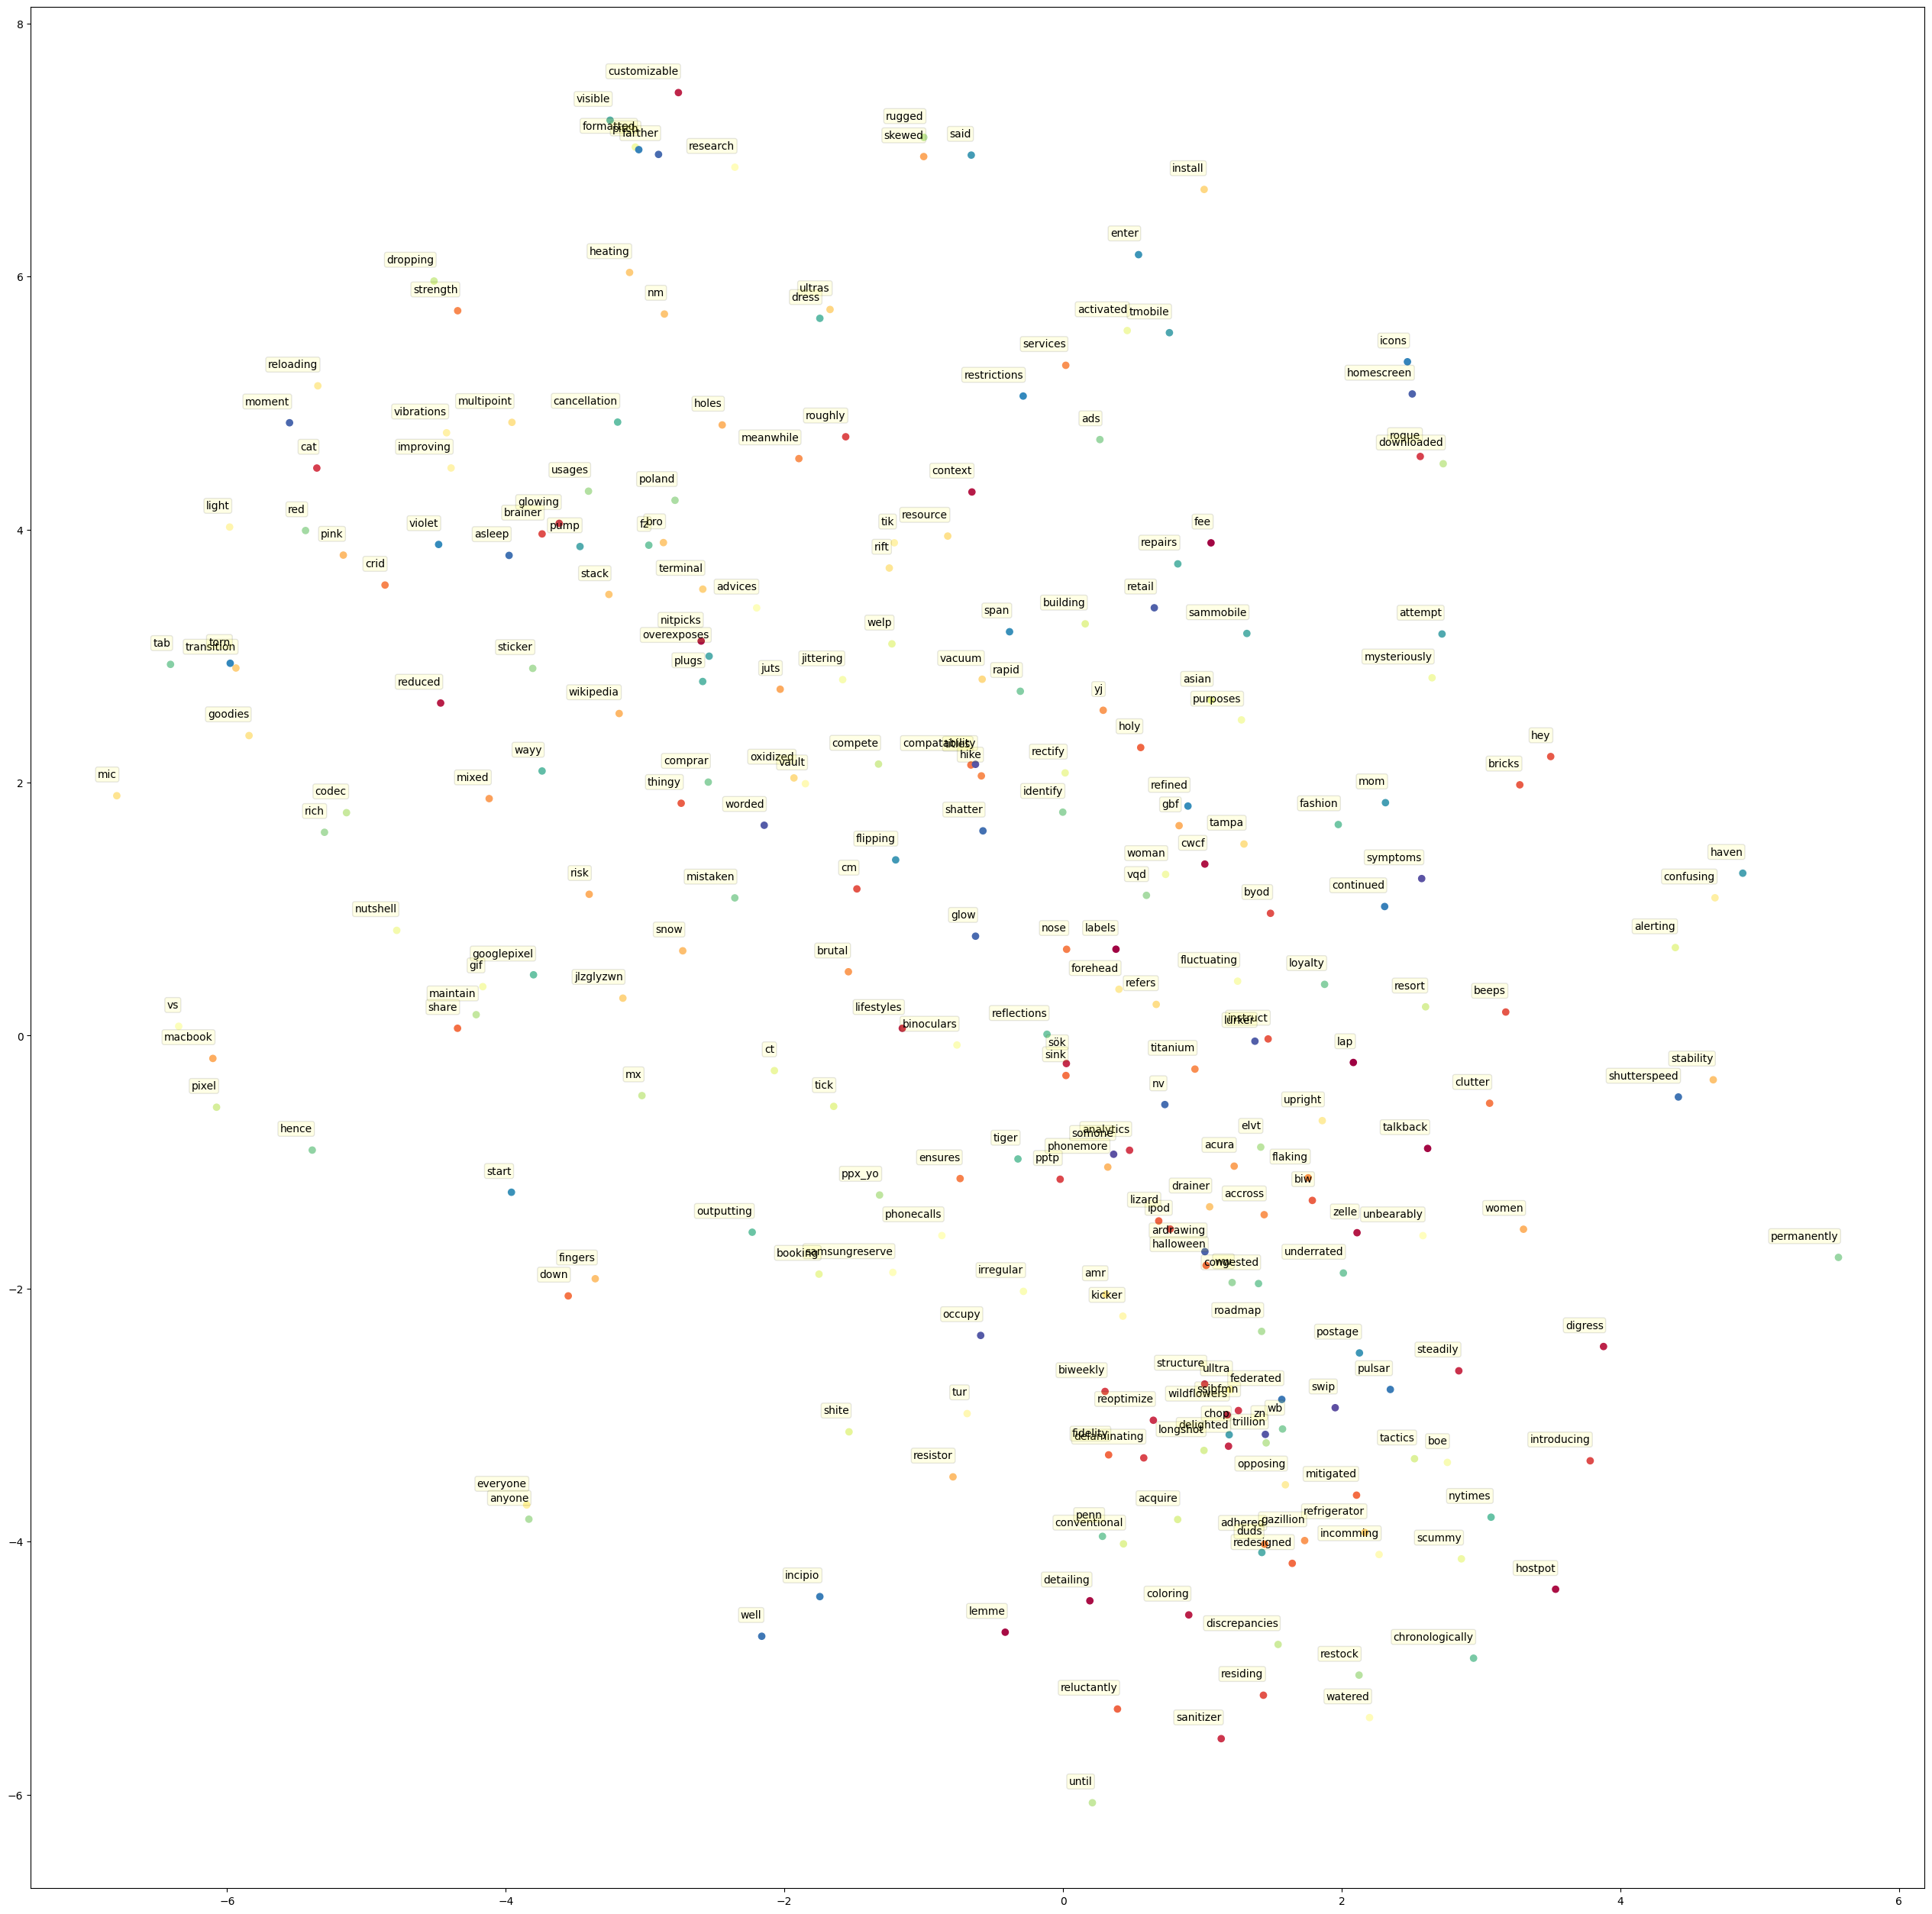

In [23]:
# Train the word2vec model
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,   # size of vectors desired
                                   window=5,          # number of words before & after target word to use as context
                                   min_count=15       # min_df
                                   )
w2v_model.build_vocab(X_train)                        # prepare the model vocabulary
w2v_model.train(X_train, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)
# w2v_model.wv.index_to_key                           # all words that Word2Vec model learned a vector for (with min_df=2)

# Find the most similar words to "king" based on word vectors from our trained model
# w2v_model.wv.most_similar('king')

# Visualizing Word2Vec Embeddings with t-SNE
semantic_similarity(X_train)


In [24]:
# Consider adding these pretty visuals for t-SNE

# https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d

In [25]:
# Create torch dataset
class VOC_Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [26]:
!pip uninstall tokenizers, transformers, torch
!pip install tokenizers, transformers==4.27.4, torch==1.4.0 -U

# Note:

# Below error kept popping up when trying to run 'from transformers import TrainingArguments, Trainer' and 'from transformers import BertTokenizer, BertForSequenceClassification'
"""
RuntimeError: Failed to import transformers.training_args because of the following error (look up to see its traceback):
cannot import name 'is_torch_npu_available' from 'transformers.utils' (/usr/local/lib/python3.10/dist-packages/transformers/utils/__init__.py) site:stackoverflow.com
"""
# Found a work around by changing BertTokenizer into transformers.BertTokenizer and BertForSequenceClassification to transformers.BertForSequenceClassification

import torch
import transformers
import tokenizers
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
#from transformers import TrainingArguments, Trainer

#from transformers import BertTokenizer, BertForSequenceClassification
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
model = transformers.BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)

ERROR: Invalid requirement: 'tokenizers,'
ERROR: Invalid requirement: 'tokenizers,'


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [28]:
# model = model.to( torch.device('cuda') )     # need NVIDIA driver for 'cuda'; currently have AMD on work laptop
# model = model.to('cpu')         # train on CPU

model = model.to('cuda')          # or  model.cuda()

In [29]:
sample_data = ["This is possibly the worst battery I have ever seen on a mobile device",
            "How is my device running so smoothly?"]
tokenizer(sample_data, padding=True, truncation=True, max_length=512)

{'input_ids': [[101, 2023, 2003, 4298, 1996, 5409, 6046, 1045, 2031, 2412, 2464, 2006, 1037, 4684, 5080, 102], [101, 2129, 2003, 2026, 5080, 2770, 2061, 15299, 1029, 102, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]]}

In [30]:
X_train, X_val, y_train, y_val = list(X_train), list(X_val), list(y_train), list(y_val)

In [31]:
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

In [32]:
X_train_tokenized.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [33]:
print(X_train_tokenized['attention_mask'][0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [34]:
train_dataset = VOC_Dataset(X_train_tokenized, y_train)
val_dataset = VOC_Dataset(X_val_tokenized, y_val)

In [35]:
train_dataset[5]

{'input_ids': tensor([  101,  4041,  2000,  6942,  2000,  1055, 19317,  2013, 18059,  1012,
          2054,  2323,  1045,  2113,  2077,  2437,  1996,  5376,  1029,  1045,
          1521,  2310,  2042,  2478, 16380,  2005,  2485, 10930,  1020,  2086,
          2085,  1998,  1996,  2197, 11924,  1045,  2109,  2001,  2019,  2004,
          2271,  1998,  1996,  1055,  2475,  1048,  2863,  2080,  1012,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   

In [36]:
def compute_metrics(m):
    print(type(m))
    pred, labels = m
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}


In [37]:
# Define Trainer
args = transformers.TrainingArguments(       # from transformers import TrainingArguments spat our error so do transformers.TrainingArguments
    report_to = 'wandb',                     # enable logging to W&B
    output_dir="output",                     # output directory
    num_train_epochs=4,
    per_device_train_batch_size=8
    # overwrite_output_dir = True,
    # evaluation_strategy = 'steps',          # check evaluation metrics at each epoch
    # learning_rate = 5e-5,                   # we can customize learning rate
    # max_steps = 30000,
    # logging_steps = 100,                    # we will log every 100 steps
    # eval_steps = 5000,                      # we will perform evaluation every 500 steps
    # save_steps = 10000,
    # load_best_model_at_end = True,
    # metric_for_best_model = 'accuracy',
    # run_name = 'custom_training'            # name of the W&B run

)
trainer = transformers.Trainer(               # from transformers import Trainer spat our error so do transformers.Trainer
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,                 # for padding batched data
    compute_metrics=compute_metrics
)

In [38]:
# https://github.com/facebookresearch/fairseq/issues/1933
# https://huggingface.co/spaces/OFA-Sys/OFA-Generic_Interface/blob/8fc1d8aafce5821301443744696303bac6227f52/fairseq/examples/roberta/commonsense_qa/README.md

# PyTorch fairseq

MAX_UPDATES=2300      # Number of training steps, where   training step = training set / batch size. Originally 3000
WARMUP_UPDATES=150    # Linearly increase LR over this many steps
MAX_EPOCH=4           # Number of training epochs.
LR=1e-05              # Peak LR for fixed LR scheduler. 1e-05 default; try 1e-06 as initial LR
NUM_CLASSES=2
MAX_SENTENCES=8       # Batch size per GPU.
UPDATE_FREQ=32        # Accumulate gradients to simulate training on 8 GPUs.
DATA_DIR='VOC_final_output'
ROBERTA_PATH='/SiERoBERT_large/model.pt'

! CUDA_VISIBLE_DEVICES=0 fairseq-train $DATA_DIR --ddp-backend=no_c10d \
  --restore-file $ROBERTA_PATH \
  --reset-optimizer --reset-dataloader --reset-meters \
  --no-epoch-checkpoints --no-last-checkpoints --no-save-optimizer-state \
  #--best-checkpoint-metric accuracy --maximize-best-checkpoint-metric \
  --task sentence_ranking \
  --num-classes $NUM_CLASSES \
  --init-token 0 --separator-token 2 \
  --max-option-length 128 \
  --max-positions 512 \
  --truncate-sequence \
  --arch roberta_large \
  --dropout 0.1 --attention-dropout 0.1 --weight-decay 0.01 \
  --criterion sentence_ranking \
  --optimizer adam --adam-betas '(0.9, 0.98)' --adam-eps 1e-06 \
  --clip-norm 0.0 \
  --lr-scheduler fixed --lr $LR \
  --warmup-updates $WARMUP_UPDATES --total-num-update $MAX_UPDATES \
  --memory-efficient-fp16 --fp16-init-scale 4 --threshold-loss-scale 1 --fp16-scale-window 128 \
  --batch-size $MAX_SENTENCES \
  --required-batch-size-multiple 1 \
  --update-freq $UPDATE_FREQ \
  --max-epoch $MAX_EPOCH \
  --log-interval 100 \

# --memory-efficient-fp16 instead of --fp16 solves 'CUDA out of memory' problem, but slow training
# --max-sentences $MAX_SENTENCES , not batch-size
# --fp16-scale-window 128 default

/bin/bash: line 1: fairseq-train: command not found


In [39]:
# clear cache before training
torch.cuda.empty_cache()

In [40]:
trainer.train()

wandb: Currently logged in as: ojw92. Use `wandb login --relogin` to force relogin


TrainOutput(global_step=13016, training_loss=0.2137704744394674, metrics={'train_runtime': 10312.74, 'train_samples_per_second': 10.095, 'train_steps_per_second': 1.262, 'total_flos': 2.739301819564032e+16, 'train_loss': 0.2137704744394674, 'epoch': 4.0})

In [41]:
trainer.evaluate()


<class 'transformers.trainer_utils.EvalPrediction'>


{'eval_loss': 0.5022413730621338,
 'eval_accuracy': 0.8980297269270653,
 'eval_precision': 0.7967257844474761,
 'eval_recall': 0.8,
 'eval_f1': 0.7983595352016406,
 'eval_runtime': 100.1668,
 'eval_samples_per_second': 28.882,
 'eval_steps_per_second': 3.614,
 'epoch': 4.0}

In [42]:
np.set_printoptions(suppress=True)


In [43]:
text = "Super charging is working very well."
# text = "so many issues with this phone."
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model(**inputs)
print(outputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)    # also gelu(), silu()
print(predictions)
predictions = predictions.cpu().detach().numpy()
predictions

SequenceClassifierOutput(loss=None, logits=tensor([[ 4.1105, -3.8922]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor([[9.9967e-01, 3.3444e-04]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


array([[0.9996656 , 0.00033444]], dtype=float32)

In [44]:
trainer.save_model('BertPractice')

In [45]:
# trainer.save_model('/content/drive/MyDrive/Youtube Tutorials/toxic')
# model_2 = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/Youtube Tutorials/toxic")
# model_2.to('cuda')

In [46]:
model_2 = transformers.BertForSequenceClassification.from_pretrained('BertPractice')
model_2.to('cuda')

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [47]:
# text = "Super charging is working very well."
text = "so many issues with this phone."
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model_2(**inputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions = predictions.cpu().detach().numpy()
predictions

array([[0.01171322, 0.9882868 ]], dtype=float32)

In [55]:
# Evaluate performance on validation set in this cell



# val_dataset
"""
from datasets import load_dataset
dataset = load_dataset('imdb')

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42)
small_eval_dataset
"""
print(small_eval_dataset)
print(val_dataset)


Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 25000
})


[8.1710634e-05, 0.002286566, 0.9923382, 6.746248e-05, 5.7348756e-05, 0.00046803913, 0.9925808, 6.503002e-05, 0.99384236, 0.9847743, 0.99386394, 5.793526e-05, 6.2981926e-05, 0.00016410391, 5.8327743e-05, 0.0034415643, 0.9940327, 6.722917e-05, 8.236574e-05, 0.99388194, 6.0936003e-05, 0.00029169663, 0.005201114, 7.292412e-05, 0.9877198, 0.9652582, 5.957436e-05, 0.9919904, 6.2298444e-05, 0.9679929, 0.0001653025, 0.00066796894, 0.00025951676, 0.00038666432, 0.00012067334, 5.6294215e-05, 0.0011200706, 7.5249e-05, 6.0604747e-05, 0.989833, 0.0013069578, 7.6053366e-05, 5.824959e-05, 0.9915856, 0.00022462744, 0.99296725, 0.9914756, 0.9930548, 8.507567e-05, 0.0005568834, 5.7451332e-05, 6.564248e-05, 8.07097e-05, 0.014639154, 0.9924941, 7.0591996e-05, 8.410857e-05, 6.012506e-05, 6.0548136e-05, 7.364013e-05, 0.9875238, 6.168906e-05, 6.0204642e-05, 5.865818e-05, 6.2090505e-05, 0.9929454, 7.178958e-05, 0.99322116, 9.67088e-05, 0.00089375983, 0.0046796077, 0.98301345, 8.450894e-05, 6.4999906e-05, 0.00

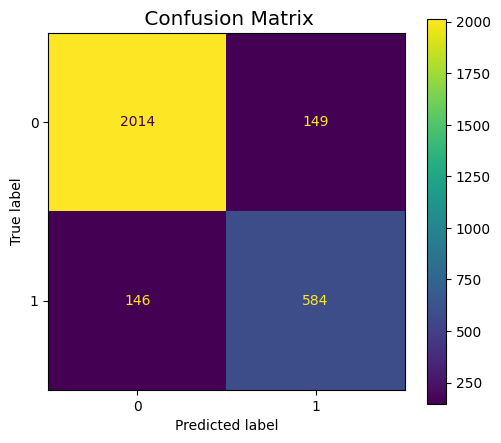

AUC :  0.9474638851417677


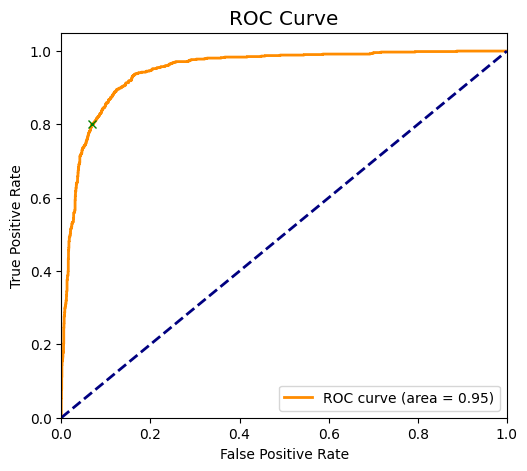

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score

"""
da_preds = pd.DataFrame({
          "Text" : X_val,
          "Class" : y_val})
da_preds = pred_day(da_preds)
"""
"""
da_predso = list()
for x in da_preds['Prediction']:
  if round(x[0][0]) == 1:
    da_predso.append(0)
  elif round(x[0][1]) == 1:
    da_predso.append(1)
print(da_predso)
"""
da_predsooo = [x[0][1] for x in da_preds['Prediction']]
print(da_predsooo)



def confusion_matrix_display(y_test, y_pred, filename=None, directory=None):
    # inputs: actual labels & prediction labels
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    cm = confusion_matrix(y_test, y_pred)     # labels=clf.classes_
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)     # display_labels=clf.classes_
    disp.plot()
    if filename is None:
        filename = ""
    plt.title(f'{filename[10:-4]} Confusion Matrix')     # test_data/test_1012.csv --> test_1012
    plt.show()

    if directory is not None:
        # save plot to directory
        f = os.path.join(directory, filename[10:-4])
        plt.savefig(f'{f}-confmat.png')

    return tn, fp, fn, tp


# Create ROC curve and compute AUC
def ROC_AUC(y_test, y_score, fpr_tpr=None):
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)    # 'thresholds' go in '_'
    roc_auc = auc(fpr, tpr)
    #print('fpr is', fpr)
    #print('tpr is', tpr)
    #print('thresholds', thresholds)
    print('AUC : ', roc_auc)

    # ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color="darkorange",
        lw=lw, label="ROC curve (area = %0.2f)" % roc_auc,)
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    if fpr_tpr is not None:
        plt.plot(fpr_tpr[0], fpr_tpr[1], color="green", lw = 3, marker='x')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'ROC Curve')
    plt.legend(loc="lower right")
    plt.show()



# Create ROC curve and compute AUC for test data
tn, fp, fn, tp = confusion_matrix_display(y_val, da_predso)
fpr_tpr = [fp/(fp+tn), tp/(tp+fn)]
ROC_AUC(y_val, da_predsooo, fpr_tpr)

In [85]:
"""
# Use the results from validation set to create a confusion matrix and ROC curve

from sklearn.metrics import confusion_matrix, roc_curve, auc

# Reference: https://towardsdatascience.com/practical-introduction-to-transformer-models-bert-4715ed0deede
# Evaluation
predictions = trainer.predict(val_dataset)

# Confusion matrix
cm = confusion_matrix(val_dataset['label'], predictions.predictions.argmax(-1))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(val_dataset['label'], predictions.predictions[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(1.618 * 5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
"""

'\n# Use the results from validation set to create a confusion matrix and ROC curve\n\nfrom sklearn.metrics import confusion_matrix, roc_curve, auc\n\n# Reference: https://towardsdatascience.com/practical-introduction-to-transformer-models-bert-4715ed0deede\n# Evaluation\npredictions = trainer.predict(val_dataset)\n\n# Confusion matrix\ncm = confusion_matrix(val_dataset[\'label\'], predictions.predictions.argmax(-1))\nsns.heatmap(cm, annot=True, fmt=\'d\')\nplt.title(\'Confusion Matrix\')\nplt.show()\n\n# ROC Curve\nfpr, tpr, _ = roc_curve(val_dataset[\'label\'], predictions.predictions[:, 1])\nroc_auc = auc(fpr, tpr)\n\nplt.figure(figsize=(1.618 * 5, 5))\nplt.plot(fpr, tpr, color=\'darkorange\', lw=2, label=\'ROC curve (area = %0.2f)\' % roc_auc)\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=2, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver operating characteristic\')\nplt.leg

In [ ]:
# Use the results to choose a threshold?



In [86]:
# Make predictions on daily data

def pred_day(voctoday):
  voclist = list(voctoday['Text'])
  predlist = []

  for i in range(len(voclist)):
    inputs = tokenizer(voclist[i], padding = True, truncation = True, return_tensors='pt').to('cuda')
    outputs = model_2(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predictions = predictions.cpu().detach().numpy()
    predlist.append(predictions)

  organizedzip = zip([x[:50] for x in voclist],
                    predlist,
                    voctoday['Class'])

  # results as voc text, predictions, and actual value
  vocresult = pd.DataFrame(list(organizedzip), columns=['Text','Prediction','Actual'])

  return vocresult


In [89]:
# test VOC
# import file and combine title & content

# test VOC for 8/14 (Mon) - 8/16 (Wed) using model trained on ~8/11 (Fri) data

voc814 = pd.read_csv('814testraw.csv', index_col=0, delimiter=",").drop_duplicates()     # use delimiter ',' for original .csv file created from my test file generator
voc814 = data_concat(voc814.loc[: , 'Title':'Class'])

voc815 = pd.read_csv('815testraw.csv', index_col=0, delimiter=",").drop_duplicates()
voc815 = data_concat(voc815.loc[: , 'Title':'Class'])

voc816 = pd.read_csv('816testraw.csv', index_col=0, delimiter=",").drop_duplicates()
voc816 = data_concat(voc816.loc[: , 'Title':'Class'])

voc817 = pd.read_csv('817testraw.csv', index_col=0, delimiter=",").drop_duplicates()
voc817 = data_concat(voc817.loc[: , 'Title':'Class'])

voc818 = pd.read_csv('818testraw.csv', index_col=0, delimiter=",").drop_duplicates()
voc818 = data_concat(voc818.loc[: , 'Title':'Class'])

voc821 = pd.read_csv('821testraw.csv', index_col=0, delimiter=",").drop_duplicates()
voc821 = data_concat(voc821.loc[: , 'Title':'Class'])

voc831 = pd.read_csv('831testraw.csv', index_col=0, delimiter=",").drop_duplicates()
voc831 = data_concat(voc831.loc[: , 'Title':'Class'])


In [90]:
vocresult814 = pred_day(voc814)
vocresult814

Text  \
0   Please help s22 vs S23. Should I pay the extra...   
1   Trade in question - screen issue My s22 ultra ...   
2   Routine How could I change the mode on my phon...   
3   S22 ultra root. I've been trying to root my s2...   
4   S22Ultra Cases and Whitestone FOR SALE\n\nSwit...   
5   Fast Charging suddenly stopped working &amp; c...   
6   Super Fast Charging 2.0 Hi, I have an S22 Ultr...   
7   Broken Screen. Options?  Cracked my screen wee...   
8   S22u green bar on camera issue is happening. I...   
9   Planing To Move To IOS Hello everyone, I'd lik...   
10  Is there an easier way to transfer music onto ...   
11  Front Camera failed I have tried resetting and...   
12  strange "answer/reject" popup when renting cal...   
13  I can get the s23 plus 256gb for ‚Ç¨700 and the ...   
14  Anyone else noticed how once your phone hits 7...   
15  Anybody received august patch yet Its 2 weeks ...   
16  Do you believe s22 wil receive 2x zoom option ...   
17  Any Gcam recommendations for s22? Could you gu...   
18  White Screen on 0.6x Camera Issue Have anyone ...   
19  Well I just learnt something weird You can use...   
20  Phone temperature flaring to 42.2¬∞C No extra a...   
21  Adaptive brightness When adaptive brightness i...   
22  Entfernungsmesser Gibt es eine M√∂glichkeit die...   
23  Notifications from Google Don't Go Away after ...   
24  Is it possible to use Smart Switch to do incre...   
25  USB C - audio adapters don't work SPECIFICALLY...   
26  S22 occasionally loses connection Went traveli...   
27  Samsung Galaxy S22 + $800 off promo Back in 20...   
28  One UI 6 beta for S22 Series? S22 Ultra user h...   
29  S23 ultra - is the zoom quality better than s2...   
30  S22 Ultra Diagnostics Pass disconnected module...   
31  S22 ultra getting 4-5 hours of screen on time ...   
32  S22 connection issues I recently replaced the ...   
33  Beta UI 6.0 Where is it? I'm on S22 Ultra T-mo...   
34  Widget font color doesn't automatically change...   
35  Message Theme I am using Samsung messaging app...   
36  What is this From time to time when I do a har...   
37  Chane finger print ID I have always had proble...   
38  Little help please I need to transfer my pics ...   
39  Sound picker How do i delete sound picker? It ...   
40  S22+ Is it possible to change screen timeout o...   
41  How to back up Samsung email on S22 ? I use Sa...   
42  Notification automatically opening Ok since I ...   
43  Cant open digital wellbeing I want to manage m...   
44  Question Does anyone know of a good app that w...   
45  Question How can I get android 14 beta in my s...   
46  Is it worth Upgrading? Hi All,I am planning to...   
47  MEDIA VOLUME LIMIT Samsung removed my previous...   
48  Hacked How can I do away with all the redirect...   
49  Samsung wallet update?? After the latest walle...   
50  How to stop my Samsung Ultra Note 22 Calender ...   

                       Prediction  Actual  
0    [[0.99992764, 7.235763e-05]]       0  
1     [[0.9990941, 0.0009058439]]       1  
2    [[0.9997632, 0.00023680972]]       0  
3   [[0.99987745, 0.00012254492]]       0  
4   [[0.99992764, 7.2310926e-05]]       0  
5     [[0.0073410855, 0.9926589]]       0  
6      [[0.013583461, 0.9864166]]       0  
7     [[0.9977464, 0.0022536137]]       1  
8      [[0.007087195, 0.9929128]]       1  
9      [[0.99984, 0.00015996133]]       0  
10   [[0.99977475, 0.0002253042]]       0  
11   [[0.9998573, 0.00014270675]]       0  
12    [[0.99837637, 0.001623562]]       1  
13    [[0.999943, 5.6979323e-05]]       0  
14      [[0.9755234, 0.02447657]]       1  
15     [[0.9999131, 8.69497e-05]]       0  
16  [[0.99986804, 0.00013189952]]       0  
17   [[0.9999336, 6.6360495e-05]]       0  
18    [[0.008809169, 0.99119085]]       1  
19   [[0.9999038, 9.6222364e-05]]       0  
20    [[0.008766968, 0.99123305]]       1  
21     [[0.9859725, 0.014027481]]       1  
22     [[0.999895, 0.0001049531]]       0  
23     [[0.006203294, 0.

In [91]:
vocresult815 = pred_day(voc815)
vocresult815

Text  \
0   Currently using s22 ultra and thinking of swit...   
1   Any reason why is S23 series behind S22 in upd...   
2   Routine not running at specified time I have a...   
3   Wifi issue on s22 ultra My wifi randomly disco...   
4   Camera lag Generally I feel like the camera ap...   
5   Phones unable to keep up. I have started notic...   
6   Screen issue (blinking pixel?) As seen in the ...   
7   Looking For Good Grip Slim Case Any Recommende...   
8   Change microphone source input Hi\n\nWhen I'm ...   
9   Recent WiFi Troubles Have a bit of a weird iss...   
10  want to buy the us unlocked version from eu so...   
11  Setting for lockscreen shortcut color Anybody ...   
12  Does Exynos model worth it? Hello,\n\nI am an ...   
13  How do I manually select the 2.4 ghz wifi netw...   
14  Gallery issue Hi,\n48MP photos from my drone d...   
15  S21 ultra or s22 plus? Both phones are current...   
16  S22 Exynos bad battery life This is my first S...   
17  S22+ Exynos constantly overheating Hello every...   
18  power saving guys I experienced that power sav...   
19  Factory reset my phone, now considerably bette...   
20  samsung s22 facial unlock any tips on improvin...   
21  Alexa App Not Responding? Using a S22. The app...   
22  Samsung S22 Ultra - USB Device Not Recognized ...   
23  Android auto not showing notification from wor...   
24  August update for S22U? I have an Unlocked S22...   
25  My S22 Ultra keeps not loading apps including ...   
26  S22 Ultra camera quality is absolutely trash I...   

                      Prediction  Actual  
0   [[0.9999298, 7.0166694e-05]]       0  
1   [[0.99983037, 0.0001696094]]       0  
2   [[0.0070923506, 0.99290764]]       1  
3   [[0.0061052484, 0.99389476]]       1  
4     [[0.006099718, 0.9939003]]       1  
5     [[0.006822068, 0.9931779]]       1  
6       [[0.00741599, 0.992584]]       1  
7     [[0.999943, 5.696862e-05]]       0  
8    [[0.9993062, 0.0006938524]]       0  
9    [[0.0065022483, 0.9934977]]       1  
10  [[0.99992704, 7.295667e-05]]       0  
11   [[0.9999068, 9.325454e-05]]       0  
12   [[0.9999424, 5.756068e-05]]       0  
13  [[0.99991167, 8.838144e-05]]       0  
14   [[0.0060576596, 0.9939423]]       1  
15  [[0.9999267, 7.3298586e-05]]       0  
16  [[0.9999397, 6.0265178e-05]]       0  
17  [[0.99994063, 5.934166e-05]]       0  
18   [[0.9994929, 0.0005070775]]       1  
19      [[0.97529, 0.024709947]]       0  
20  [[0.9992785, 0.00072153396]]       1  
21  [[0.99898094, 0.0010189969]]       0  
22    [[0.007817856, 0.9921821]]       1  
23   [[0.006139634, 0.99386036]]       1  
24  [[0.99993885, 6.112188e-05]]       0  
25  [[0.0060730474, 0.99392694]]       1  
26    [[0.005866751, 0.9941333]]       1

In [92]:
vocresult816 = pred_day(voc816)
vocresult816

Text  \
0   Deals on new S22? I'm trading my fold 4 if tha...   
1   Reception Issues: IF YOU HAVE WARRANTY (24 mon...   
2   Stutters I recently got an Unlocked Verizon S2...   
3   Data Recovery from Broken Phone Hey all,\n\nSo...   
4   S22 ultra is good? Switching to Fold 5 will be...   
5   Replacement keeps randomly shutting off Had to...   
6   Question I bought my s22 ultra late last year ...   
7   Letterboxing on Windows slideshow I put the fi...   
8   Is the official Galaxy Tab S4 keyboard case be...   
9   Gifs Sooo my wife and I have the same phone, w...   
10  im about to give up and end all this madness.....   
11  Back up and restore I received my replacement ...   
12  Wi-Fi not turning on Wi-Fi suddenly stopped wo...   
13  Wi-Fi not turning on Wi-Fi suddenly stopped wo...   
14  Timer Hi all,\n\nJust upgraded to a s22 ultra....   
15  One UI 6 Beta forum goes live for Galaxy S22 S...   
16  S22 ultra Wi-Fi not turning on S22 ultra\n\n \...   
17                        The UI still has stutters!    
18  Black screen Powerpoint                I have ...   
19  Talkback photo description TalkBack needs a fe...   
20  Emoji reaction to texts I have a Samsung galax...   

                      Prediction  Actual  
0    [[0.9999213, 7.862263e-05]]       0  
1   [[0.99491715, 0.0050828066]]       0  
2     [[0.9941614, 0.005838499]]       1  
3   [[0.9998511, 0.00014889556]]       0  
4   [[0.99992514, 7.490692e-05]]       0  
5    [[0.005933679, 0.99406636]]       1  
6   [[0.99992216, 7.782901e-05]]       0  
7   [[0.9997254, 0.00027453396]]       0  
8      [[0.9999311, 6.8868e-05]]       0  
9      [[0.9844493, 0.01555061]]       0  
10   [[0.99398285, 0.006017133]]       0  
11     [[0.9661055, 0.03389448]]       0  
12   [[0.0058858157, 0.9941142]]       1  
13    [[0.0060909884, 0.993909]]       1  
14  [[0.9996598, 0.00034019476]]       0  
15   [[0.9999231, 7.693145e-05]]       0  
16    [[0.006282682, 0.9937173]]       1  
17   [[0.9999341, 6.591321e-05]]       1  
18   [[0.9997552, 0.0002448278]]       1  
19  [[0.9997092, 0.00029078205]]       0  
20  [[0.9996039, 0.00039603625]]       0

In [93]:
vocresult817 = pred_day(voc817)
vocresult817

Text  \
0                       Is this snapdragon or exynos    
1   Bought a S22 Ultra second hand, in excellent c...   
2   Upgrade device I got an offer from the insuran...   
3            Weird background music randomly playing    
4   The speaker placement on the "note" devices af...   
5   max number of esims installed? anybody know wh...   
6   Other people getting holes in their pants from...   
7   No Wifi Calling option Company recently starte...   
8   Overheating and battery life is bad I just got...   
9   Phone cases for the S22 Ultra that support NFC...   
10  Can't turn off voLTE after August update Anybo...   
11  I flashed my TMB/TMB/TMK S22 Ultra to the late...   
12  Best phone options while abroad in Europe and ...   
13  Why can't I block voicemail notfication? Is sl...   
14  August update Has anyone gotten August update ...   

                       Prediction  Actual  
0     [[0.9999434, 5.667212e-05]]       0  
1     [[0.9999254, 7.465904e-05]]       0  
2     [[0.9999355, 6.445721e-05]]       0  
3      [[0.009089404, 0.9909106]]       1  
4       [[0.22490433, 0.7750957]]       1  
5       [[0.9999201, 7.9897e-05]]       0  
6   [[0.99987507, 0.00012493276]]       0  
7     [[0.999747, 0.00025304733]]       1  
8     [[0.006492706, 0.99350727]]       1  
9   [[0.99992347, 7.6530545e-05]]       0  
10     [[0.008431606, 0.9915684]]       1  
11    [[0.9988558, 0.0011441506]]       1  
12     [[0.999936, 6.406801e-05]]       0  
13     [[0.68200547, 0.31799453]]       1  
14  [[0.99991333, 8.6639324e-05]]       0

In [94]:
vocresult818 = pred_day(voc818)
vocresult818

Text  \
0   Shoot the shot or not? I have the chance to ge...   
1   Pre-installed mcafee So my s22 ultra have alre...   
2   Screen wakes up in pocket Hi all, \n\nI have w...   
3   What would you do? I just upgraded to a S22 ul...   
4   Telephoto cameras Every spec sheet I see says ...   
5   S22U Vs S23 + Hello. I have an option to buy t...   
6   I guess I got lucky with my S22 SD My S22 base...   
7   S22 Microphone issue So I recently got an S22 ...   
8   Which Font Size and Screen Zoom settings do yo...   
9   USB-C problem S22 I don‚Äôt remember if i have a...   
10  S22+ exynos battery died and took a while to c...   
11  For anyone having ssues with Galaxy S22 Ultra ...   
12  Severely dissapointed in my s22 Its been almos...   
13  S22U Vs s23+ Hello. I have an option to buy th...   
14  "To use Android System, turn off mobile hotspo...   
15  Slow motion camera change its speed randomly. ...   
16  How can I stop callers from getting this messa...   
17  Smartthings widget for items Is there a way to...   
18  Samsung messages Noticed that while using wifi...   
19  App icons disappearing I've noticed a couple a...   
20  Auto Reset Trying to figure out if there's a w...   

                       Prediction  Actual  
0     [[0.9999341, 6.597717e-05]]       0  
1   [[0.99982244, 0.00017757117]]       0  
2     [[0.006622974, 0.99337703]]       0  
3     [[0.9999206, 7.942026e-05]]       0  
4    [[0.99978966, 0.0002103848]]       0  
5    [[0.9999379, 6.2124505e-05]]       0  
6    [[0.9998067, 0.00019335731]]       0  
7   [[0.99994206, 5.7881694e-05]]       0  
8   [[0.9998858, 0.000114168644]]       0  
9    [[0.99835855, 0.0016414383]]       0  
10   [[0.9999418, 5.8115653e-05]]       0  
11    [[0.0105434125, 0.9894566]]       0  
12    [[0.007108359, 0.99289167]]       0  
13   [[0.9999379, 6.2124505e-05]]       0  
14    [[0.011874593, 0.98812544]]       1  
15   [[0.0076303505, 0.99236965]]       1  
16      [[0.0403882, 0.95961183]]       1  
17  [[0.99987686, 0.00012313235]]       0  
18      [[0.007542086, 0.992458]]       1  
19     [[0.9980842, 0.001915795]]       0  
20    [[0.9998516, 0.0001484507]]       0

In [95]:
vocresult821 = pred_day(voc821)
vocresult821

Text  \
0   Is this even possible with last year s22? 56% ...   
1   S22+ battery is $h*t, go to S23+? Probably bee...   
2   Can't update apps with wifi Despite having no ...   
3   Dex only works when connected to power I've ha...   
4   Cracked trade in question I was recently debat...   
5   Status bar burn-in Anyone else having burn-in ...   
6   in a day to day scenario, does anyone else use...   
7   How can I get this clock on my lockscreen and ...   
8   Refurbished 22ultra vs fixing current? So I go...   
9   !!PLEASE HELP!! (I'm in a panicking situation ...   
10  No gif options in samsung keyboard I don't hav...   
11  S22 ultra static mic noise Hey guys,\n\nMy s22...   
12  KeysCafe not working Hey. S22U user here. Keys...   
13  Resolution when notch is hidden? What is the m...   
14  Pixel 6 to S22u Hi, I currently have the Googl...   
15  Links Keep Opening in Samsung Browser For what...   
16  Gallery app photos and albums are missing... I...   
17  no fast charging As the title says since yeste...   
18  S22 battery life On 120hz for initial 15 perce...   
19  Aug 2023 update for S22 in India It is Aug 20 ...   
20  Not getting texts that were sent while out of ...   
21  S22+ or S23??? Looking for a new galaxy, I lik...   
22  Is anyone else absolutely disappointed in thei...   
23  Is there a way to hide certain photos from rec...   
24  How can I understand the RAM difference? My wi...   
25  Stuck in May update Anyone still stuck in May ...   
26  STOP spotify bursting out some random full noi...   
27  Does screen refresh rate on Motion Smoothness ...   
28  S22ultra Replacement I've had my phone about a...   
29  S22 Ultra (carrier version) Aug update now ava...   
30  S23 256 vs S22 ultra 128gb (Europe) Hello, I'm...   
31  S22u still switching (some) cameras automatica...   
32  Contrast to many that are disappointed to S22 ...   
33  Note 20 ultra vs S22 ultra I am trying to deci...   
34               Beta When is the beta for s22 ultra?   
35   Hello When Star the new android 14and UI6 Beta?üòä   
36  Continuous loop recording possible? HiIs it po...   
37  One UI 6 Beta for S22 Forum? I read that Samsu...   
38  Can not download system update Hello I am havi...   
39  Picture Stuck Processing in Camera/Gallery for...   
40           Beta for s22 ultra When will it come out   
41  Security patches Has anyone gotten the August ...   
42                                agust update is big   
43  Enabling "Double-tap to turn on screen" withou...   
44  Petition Samsung to create more colorful phone...   

                        Prediction  Actual  
0      [[0.98919094, 0.010809104]]       0  
1      [[0.9994686, 0.0005313521]]       1  
2      [[0.0075805914, 0.9924194]]       1  
3      [[0.008688548, 0.99131143]]       1  
4     [[0.99992776, 7.219607e-05]]       0  
5         [[0.009859971, 0.99014]]       0  
6      [[0.9996836, 0.0003163862]]       0  
7     [[0.99836856, 0.0016314985]]       0  
8         [[0.9930815, 0.0069185]]       1  
9      [[0.024667587, 0.97533244]]       1  
10   [[0.99994266, 5.7325135e-05]]       0  
11      [[0.005913473, 0.9940865]]       1  
12      [[0.0071439864, 0.992856]]       1  
13     [[0.999767, 0.00023298764]]       0  
14   [[0.99994266, 5.7296547e-05]]       0  
15     [[0.0061173025, 0.9938828]]       1  
16      [[0.008170766, 0.9918292]]       1  
17     [[0.007036719, 0.99296325]]       1  
18       [[0.9931739, 0.00682613]]       0  
19    [[0.9999422, 5.7860616e-05]]       0  
20     [[0.0068231532, 0.9931768]]       1  
21     [[0.99992585, 7.41496e-05]]       0  
22    [[0.99993944, 6.060648e-05]]       0  
23    [[0.9998103, 0.00018975868]]       0  
24     [[0.9999423, 5.764022e-05]]       0  
25       [[0.9999, 9.9972065e-05]]       0  
26     [[0.0077071222, 0.9922929]]       1  
27     [[0.9983265, 0.0016735196]]       0  
28  [[0.99989235, 0.000107620355]]       0  
29   [[0.99994004, 6.0005063e-05]]       0  
30    [[0.99994075, 5.927182

In [96]:
vocresult831 = pred_day(voc831)
vocresult831

Text  \
0   My camera won't record video longer than 8 min...   
1   Smartview for laptop connection not working Is...   
2   Secure Folder trf/backup Can we trf files, pho...   
3   I need help with this secure folder So I'm usi...   
4   I need help with this secure folder So I'm usi...   
5   Hi everyone I just had a question about the sc...   
6   Anyone else already getting screen burn in ? A...   
7   Clean front speaker Hi rveryone, i noticed tha...   
8   What Messages app you're using? I'm actually u...   
9   Asking for Basic (Auto, not Pro) Camera Photo ...   
10  Low volume even if set at highest Low volume a...   
11  Amoled Photo screen mode changes colour when I...   
12  Exchange between Galaxy A54 and s22 Hello.\n\n...   
13  S22 FRP lock Hi,\n\nMy father in law has passe...   
14  Is the support feature actually useful I've su...   
15  Galaxy S22 Ultra My Galaxy phone continues reb...   
16  Phone update My Samsung Ultra Note 22 phone di...   
17  Auto opening Internet browser Hi..My" internet...   
18  Software update interrupted (AT&T) I have a s2...   

                       Prediction  Actual  
0      [[0.005993565, 0.9940064]]       1  
1      [[0.006191863, 0.9938081]]       1  
2    [[0.9998523, 0.00014766447]]       0  
3       [[0.04431225, 0.9556878]]       1  
4       [[0.04431225, 0.9556878]]       1  
5   [[0.99983025, 0.00016972669]]       0  
6      [[0.02638883, 0.97361124]]       1  
7        [[0.8558357, 0.1441643]]       0  
8   [[0.99978715, 0.00021286949]]       0  
9   [[0.99988663, 0.00011334522]]       0  
10     [[0.009243902, 0.9907561]]       1  
11    [[0.0074305595, 0.9925694]]       0  
12     [[0.9999372, 6.28014e-05]]       0  
13     [[0.9959519, 0.004048135]]       0  
14   [[0.9998354, 0.00016460792]]       0  
15    [[0.005994866, 0.99400514]]       1  
16     [[0.013250812, 0.9867491]]       1  
17      [[0.8647998, 0.13520017]]       1  
18   [[0.0062181093, 0.99378186]]       1

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e5caba9f-cd36-4d50-aaa3-2cf59957a2f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>